In [ ]:
!python --version

In [85]:
# General Imports
import re
import time
from time import sleep
from pprint import pprint
from datetime import datetime
import pickle

# Data processing/Visuals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, roc_curve

# Scraping
import requests
from bs4 import BeautifulSoup

# NLP
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from nltk import NaiveBayesClassifier
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#Extra
from ipywidgets import FloatProgress
from IPython.display import display

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

## Problem Statement

Classified ads from Backpage.com using Naive Bayes to determine potential human trafficking victims. Built a D3 interactive map to assist law enforcement.

In [ ]:
##Testing URL break

url = 'http://sfbay.backpage.com/FemaleEscorts/?page=2'
response = requests.get(url)
page = response.text
print("Status Code is:", response.status_code)

## Pulling 1200 URLS

In [272]:
re_escortads = re.compile("^cat")

all_ad_info = []
f = FloatProgress(min=0, max=1)
display(f)

for num in range(0,1):
    if num != 1:
        url = 'http://sfbay.backpage.com/FemaleEscorts/?layout=date&page={}'.format(num)
    else:
        url = 'http://sfbay.backpage.com/FemaleEscorts/?layout=date'
    
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, 'lxml')

    ads = soup.find_all(class_=re_escortads)

    for ad in ads:
        find_url = ad.find('a')
        find_location = ad.find('span', class_='resultsRegionLabel')

        url = find_url['href']
        title = find_url.text    
        all_ad_info.append([url])
        
    f.value = num
    random_num = (np.random.randint(0,2))
    sleep(0+random_num)
    
url_title_df = pd.DataFrame(all_ad_info, columns=['URL'])

In [274]:
len(url_title_df)
# url_title_df

300

## Getting AD INFO

In [ ]:
# Grabbing only 1000
url_title_df = url_title_df.head(1000).copy()
url_title_df.to_csv('url_title_df_1000.csv',index_col=False)

In [ ]:
all_details = []
f1 = FloatProgress(min=0, max=len(url_title_df)-1)
display(f1)

for url in url_title_df['URL']:
    try:
        page_url = url
        response = requests.get(page_url)
        page = response.text
        soup = BeautifulSoup(page, 'lxml') 

        # Post Title
        find_title = soup.find('title')
        title = find_title.text

        # Post Date
        find_post_date = soup.find("div", class_="adInfo")
        date = find_post_date.text.strip()
        
        # Post Description
        find_desc = soup.find("div",class_="postingBody")
        desc = find_desc.text.strip()

        # Poster's Age
        find_age = soup.find("div",class_="posting").find(class_="metaInfoDisplay")
        age = find_age.text.strip()

        # Poster's Location
        find_location = soup.find("div",class_="posting").find(style="padding-left:2em;")
        location = find_location.text.strip()[1:]
        
        all_details.append([url,title,date,desc,age,location])
#         all_details.append([page_url,url,title])
        
    except:
        print("Failed for:", page_url)
        
    f1.value +=1
    random_num = (np.random.randint(3,5))
    sleep(0+random_num)

In [ ]:
all_details_df = pd.DataFrame(all_details)
len(all_details_df)

In [ ]:
len(all_details_df)
all_details_df.to_csv('scrape_of_1000.csv',index_col=False)
all_details_df.head(10)

## Start Here if Reloading

In [86]:
all_details_df = pd.read_csv("scrape_of_1000.csv",index_col=False)
all_details_df.head(10)

,Unnamed: 0,0,1,2,3,4,5
0,0,http://sfbay.backpage.com/FemaleEscorts/always-discreet-super-busty-biracial-outcall/38549218,Always Discreet... Super Busty... Biracial... Outcall - SF Bay escorts - backpage.com,"Posted:\r\n Monday, September 12, 2016 1:30 PM","I am a Independent Companion. Half European and half African-American descent. 5’6” 200lbs , 36H, with long hair, soft lips and a beautiful smile.\n\nElegant and well spoken. Always discreet... Sensual, passionate and wild. \nAllow me to pamper you...\n\nThere is a screening process... 925-400-7091\nNatalie \n\n1 hour minimum. 90 minutes suggested- \nOUTCALL ONLY\n\nAdditional photos upon request.",Poster's age: 33,"Location:\r\n Bay Area, San Francisco"
1,1,http://sfbay.backpage.com/FemaleEscorts/loving-skilled-massage-intuitive-healing-touch-by-beautiful-europen/38790518,💟 💟 — Loving Skilled Massage — 💟 💟 💟 💟 — Intuitive Healing Touch ♥ ♥ by Beautiful Europen - SF Bay escorts - backpage.com,"Posted:\r\n Monday, September 12, 2016 1:30 PM",916.693.91.26 CALL NAOMI \n\nThe perfect intimate touch.,Poster's age: 45,"Location:\r\n City of San Jose, San Jose, San Jose / South Bay"
2,2,http://sfbay.backpage.com/FemaleEscorts/latina-beauty-naughty-nicole-available-for-outcalls-only/38792274,"Latina Beauty, Naughty Nicole, AVAILABLE for OUTCALLS ONLY! - SF Bay escorts - backpage.com","Posted:\r\n Monday, September 12, 2016 1:30 PM","Young & Naughty Nicole 💯% REAL! ❥Sweet Seductive & Intelligent .. I'm the perfect combination of sultry vixen & girl next door🎀 ❥Always discrete & No drama. Passionate & sensual, my goal is to keep you relaxed & coming back for more🎀 ❥Soft skin, silky long hair, sparkling eyes, beautiful lips, cute toes, & a perfect figure🎀 🍒 Available 24/7 for outcalls 🙈 100% safe and discreet 📲\n415-234-0211. Naughty Nicole",Poster's age: 21,Location:\r\n San Francisco
3,3,http://sfbay.backpage.com/FemaleEscorts/super-sexy-l%CE%B9m%CE%B9%CF%84%CE%B5d-ed%CE%B9%CF%84%CE%B9o%CE%B7-100-real-f-%CE%B5-s%CE%B5xxy-%CF%81l%CE%B1%CE%B3m%CE%B1-%CE%B5-sp/38434530,Super Sexy👄💋💕💎 💎 Lίmίτεd Edίτίoη ★ 100% REAL💎💎【 F¡√ε ★ 】 💎💎【 SεXXy ρℓαγmα†ε 】💎 👄💕💎 💯sp - SF Bay escorts - backpage.com,"Posted:\r\n Monday, September 12, 2016 1:30 PM","I'm a 💋sexy classy👌 petite😮 jaw Dropping white girl ready to take you in to a 🌍of pleasure😜. Let me put your mind at ease & leaving you feeling Fantastic. My skills well make you Lose your mind🙇! I'm the Girl 👸who 💙 what she does ! You work hard You deserve to INDULGE in a little fun.😍 GIVE ME A CALL/TEXT \n💋Cassidy 💋\n💕💕💕 ✔💯% REAL\n559-495-5049\nUN-RUSHED\n✔FIVE-STAR EXPERIENCE💯%\n✔SAFE, DISCREET, &CLEAN LOCATION\n✔DRAMA FREE 🚫NO BS\n✔Incall Only",Poster's age: 20,"Location:\r\n Concord, East Bay"
4,4,http://sfbay.backpage.com/FemaleEscorts/san-francisco-spa/24835623,San Francisco spa - SF Bay escorts - backpage.com,"Posted:\r\n Monday, September 12, 2016 1:30 PM","Are you Tensed?\n Let us help you to Release Your body stress and Heal your mind after your long hrs of works\n OPEN EVERYDAY- \nIn call- 5AM - 11:00PM\n7 staff are always available\n$60 1hr\n 629 TayLor st SF ca 94102 \n Text only (415) 980-9795\nPlease come in person and do not ask over the phone because we cant speak much😜\n yes we do 😜 \n and yes we are😜\nWalk in, no appointment is needed and we will serve you like you are a king 😍\n7 rooms are always available,\n Thank you!",Poster's age: 19,Location:\r\n san francisco
5,5,http://sfbay.backpage.com/FemaleEscorts/santa-clara-in-call-new-face-asian-girl-kissing-touch-real-body-%EF%B8%8F-best-service/35430921,(Santa Clara in call)✩✩NEW face ❤❤❤ Asian Girl 🈲★🔞 Kissing! Touch ✓✓✓ Real Body 🔞★㊙️ BEST Service - SF Bay escorts - backpage.com,"Posted:\r\n Monday, September 12, 2016 1:29 PM",beautiful asian girl Angie. with a prety face and long hair.come enjoy unforgettable asian massage.\ncall at 408-828-1566. for a wonderful time together.\n🌟\nIf you like something more please come talk Face to face extra available\n\n\n\n🌟 Clean & safe place 🌟

## Cleaning The Data

In [87]:
# all_details_df.drop('0', axis=1, inplace=True)
all_details_df.drop("Unnamed: 0", axis=1, inplace=True)
all_details_df.columns = ['URL','Title','PostDate','Desc','Age','Location']


for col_name in [col for col in all_details_df.columns]:
    all_details_df[col_name] = all_details_df[col_name].str.strip()
    all_details_df[col_name] = all_details_df[col_name].str.replace("\r\n"," ")
    all_details_df[col_name] = all_details_df[col_name].str.replace("\n"," ")
    
# Changes to Title
all_details_df['Title'] = all_details_df['Title'].str.replace(" - SF Bay escorts - backpage.com","")

# Changes to PostDate
all_details_df['PostDate'] = all_details_df['PostDate'].str.replace("Posted: ","")

# Changes to Age
all_details_df['Age'] = all_details_df['Age'].str.replace("Poster's age: ","")
all_details_df['Age'] = all_details_df['Age'].astype(int)

# Changes to Location
all_details_df['Location'] = all_details_df['Location'].str.replace("Location: ","")


all_details_df.reset_index(inplace=True)
all_details_df.drop("index", axis=1, inplace=True)


In [88]:
# Theory Crafting (New Column)
all_details_df['Desc'] = all_details_df['Title']+' '+all_details_df['Desc']

In [89]:
## Theory Crafting (Remove phone Numbers)
all_details_df['Desc'] = all_details_df['Desc'].str.replace(r'\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}',"")

## Theory Crafting (Removing Underlines)
all_details_df['Desc'] = all_details_df['Desc'].str.replace(r'_*',"")

## Theory Crafting (Removing All Numbers)
all_details_df['Desc'] = all_details_df['Desc'].str.replace(r'[0-9]',"")

# all_details_df['Desc'] = all_details_df['Desc'].str.replace(r'\d'," ")
all_details_df

,URL,Title,PostDate,Desc,Age,Location
0,http://sfbay.backpage.com/FemaleEscorts/always-discreet-super-busty-biracial-outcall/38549218,Always Discreet... Super Busty... Biracial... Outcall,"Monday, September 12, 2016 1:30 PM","Always Discreet... Super Busty... Biracial... Outcall I am a Independent Companion. Half European and half African-American descent. ’” lbs , H, with long hair, soft lips and a beautiful smile. Elegant and well spoken. Always discreet... Sensual, passionate and wild. Allow me to pamper you... There is a screening process... Natalie hour minimum. minutes suggested- OUTCALL ONLY Additional photos upon request.",33,"Bay Area, San Francisco"
1,http://sfbay.backpage.com/FemaleEscorts/loving-skilled-massage-intuitive-healing-touch-by-beautiful-europen/38790518,💟 💟 — Loving Skilled Massage — 💟 💟 💟 💟 — Intuitive Healing Touch ♥ ♥ by Beautiful Europen,"Monday, September 12, 2016 1:30 PM",💟 💟 — Loving Skilled Massage — 💟 💟 💟 💟 — Intuitive Healing Touch ♥ ♥ by Beautiful Europen ... CALL NAOMI The perfect intimate touch.,45,"City of San Jose, San Jose, San Jose / South Bay"
2,http://sfbay.backpage.com/FemaleEscorts/latina-beauty-naughty-nicole-available-for-outcalls-only/38792274,"Latina Beauty, Naughty Nicole, AVAILABLE for OUTCALLS ONLY!","Monday, September 12, 2016 1:30 PM","Latina Beauty, Naughty Nicole, AVAILABLE for OUTCALLS ONLY! Young & Naughty Nicole 💯% REAL! ❥Sweet Seductive & Intelligent .. I'm the perfect combination of sultry vixen & girl next door🎀 ❥Always discrete & No drama. Passionate & sensual, my goal is to keep you relaxed & coming back for more🎀 ❥Soft skin, silky long hair, sparkling eyes, beautiful lips, cute toes, & a perfect figure🎀 🍒 Available / for outcalls 🙈 % safe and discreet 📲 . Naughty Nicole",21,San Francisco
3,http://sfbay.backpage.com/FemaleEscorts/super-sexy-l%CE%B9m%CE%B9%CF%84%CE%B5d-ed%CE%B9%CF%84%CE%B9o%CE%B7-100-real-f-%CE%B5-s%CE%B5xxy-%CF%81l%CE%B1%CE%B3m%CE%B1-%CE%B5-sp/38434530,Super Sexy👄💋💕💎 💎 Lίmίτεd Edίτίoη ★ 100% REAL💎💎【 F¡√ε ★ 】 💎💎【 SεXXy ρℓαγmα†ε 】💎 👄💕💎 💯sp,"Monday, September 12, 2016 1:30 PM","Super Sexy👄💋💕💎 💎 Lίmίτεd Edίτίoη ★ % REAL💎💎【 F¡√ε ★ 】 💎💎【 SεXXy ρℓαγmα†ε 】💎 👄💕💎 💯sp I'm a 💋sexy classy👌 petite😮 jaw Dropping white girl ready to take you in to a 🌍of pleasure😜. Let me put your mind at ease & leaving you feeling Fantastic. My skills well make you Lose your mind🙇! I'm the Girl 👸who 💙 what she does ! You work hard You deserve to INDULGE in a little fun.😍 GIVE ME A CALL/TEXT 💋Cassidy 💋 💕💕💕 ✔💯% REAL UN-RUSHED ✔FIVE-STAR EXPERIENCE💯% ✔SAFE, DISCREET, &CLEAN LOCATION ✔DRAMA FREE 🚫NO BS ✔Incall Only",20,"Concord, East Bay"
4,http://sfbay.backpage.com/FemaleEscorts/san-francisco-spa/24835623,San Francisco spa,"Monday, September 12, 2016 1:30 PM","San Francisco spa Are you Tensed? Let us help you to Release Your body stress and Heal your mind after your long hrs of works OPEN EVERYDAY- In call- AM - :PM staff are always available $ hr TayLor st SF ca Text only Please come in person and do not ask over the phone because we cant speak much😜 yes we do 😜 and yes we are😜 Walk in, no appointment is needed and we will serve you like you are a king 😍 rooms are always available, Thank you!",19,san francisco
5,http://sfbay.backpage.com/FemaleEscorts/santa-clara-in-call-new-face-asian-girl-kissing-touch-real-body-%EF%B8%8F-best-service/35430921,(Santa Clara in call)✩✩NEW face ❤❤❤ Asian Girl 🈲★🔞 Kissing! Touch ✓✓✓ Real Body 🔞★㊙️ BEST Service,"Monday, September 12, 2016 1:29 PM",(Santa Clara in call)✩✩NEW face ❤❤❤ Asian Girl 🈲★🔞 Kissing! Touch ✓✓✓ Real Body 🔞★㊙️ BEST Service beautiful asian girl Angie. with a prety face and long hair.come enjoy unforgettable asian massage. call at . for a wonderful time together. 🌟 If you like something more please come talk Face to face extra available 🌟 Clean & safe place 🌟 🌟 Cash Only 🌟 🌟 am - pm 🌟 If you contact me you promise you are NOT any law enforcement! - min - min - min - min,24,"San Jose / South Bay, Santa Clara, Santa Clara / Sunnyvale /

In [90]:
all_details_clean_df = all_details_df.copy()
all_details_clean_df.to_csv('scrape_of_1000_clean.csv',index_col=False)

In [91]:
# New Column To Test Theory

In [92]:
answers_df = pd.read_csv("Answers.csv", index_col=False)
print('df_length:', len(answers_df))
print('\n')
print('value_counts')
print(answers_df['Answers'].value_counts())

df_length: 401


value_counts
1    178
0    143
x    80 
Name: Answers, dtype: int64


In [93]:
# Creating an index and merging on index
answers_df.reset_index(inplace=True)
all_details_clean_df.reset_index(inplace=True)
combined_df = all_details_clean_df.merge(answers_df, on='index')

In [94]:
# Munging Through
combined_df_clean = combined_df[(combined_df['Answers'] != 'x')]
combined_df_clean.tail(10)

,index,URL,Title,PostDate,Desc,Age,Location,Answers
388,388,http://sfbay.backpage.com/FemaleEscorts/peacials-sexy-exotic-mix-ready-to-play/38788501,💞💞💞💞💞💞💞 $peacials 💞💞💞💞💞 Sexy💞 Exotic 💞 Mix💞 Ready 💞To 💞💞Play 💞💞💞💞💞💞💞💞💞,"Monday, September 12, 2016 11:48 AM","💞💞💞💞💞💞💞 $peacials 💞💞💞💞💞 Sexy💞 Exotic 💞 Mix💞 Ready 💞To 💞💞Play 💞💞💞💞💞💞💞💞💞 Hey there, its me 🌹Rose Gold and im back in the bay baby... Im an extoic mixed (Italian, Spanish,Islander) Queen awaiting YOU👈.. So let me give you what you seem to be missing 💋 a sexy,hot and satisfing time. Dont keep me waiting it has been far to long.. Call me asap 💋💋💋💋 ask about Donations 🌹🌹🌹 Rose Gold",28,"Fairfield, Incall_Outcall, North Bay",1
389,389,http://sfbay.backpage.com/FemaleEscorts/service-service-service-u-know-nuru-69-style-dfk-asian-girl/28305948,🌟☀☀☀☀☀🌟 Service Service Service U KNOW 🌟☀☀☀☀☀🌟 NURU / 69 STYLE / DFK 🌟☀☀☀☀☀🌟 Asian girl 🌟☀☀☀☀☀🌟,"Monday, September 12, 2016 11:47 AM","🌟☀☀☀☀☀🌟 Service Service Service U KNOW 🌟☀☀☀☀☀🌟 NURU / STYLE / DFK 🌟☀☀☀☀☀🌟 Asian girl 🌟☀☀☀☀☀🌟 Hi Every Gentleman I'm Mimi, New from California, Independent Asian Girl. I'm DD Big Breast, "" inch, lbs. I'm very Open-Minded, We Can Do French Kissing, Style, Everything💋💋 Call me Now - - Donation:HR /HHR Sorry. No AA",21,"N. San Jose 🌟☀☀☀☀☀🌟 Santa Clara 🌟☀☀☀☀☀🌟, San Jose / South Bay, Santa Clara",1
390,390,http://sfbay.backpage.com/FemaleEscorts/fremont-160-x-2x-are-you-want-come-try-nurum-assage-sasa-wait-you-4084939272/38750039,(fremont)👄 160$X 2X are you want come try nurum assage??🌹sasa wait you !!!! 4084939272.,"Monday, September 12, 2016 11:46 AM","(fremont)👄 $X X are you want come try nurum assage??🌹sasa wait you !!!! . sasa Just arrived, She is Fantastic Asian Girl...With her...You can Have a lot of fun.... only stay shot days , take chance to meet her. give you the best nurn massage,also very Good at Full Body Rubs... All your desire will be satisfied. Donations: $/hrX, $/hh. $ nuru massage *Call to make an appointment: (plz no text or voicemail & serious gentlemen only!) sorry no AA gentleman",24,"East Bay, Fremont",1
391,391,http://sfbay.backpage.com/FemaleEscorts/bella-bella-2x-free/35935798,💋💗💥☶▊💋💗💥☶▊💋💗💥☶▊BELLA 💋💗💥☶▊💋💗💥☶▊💋💗💥☶▊BELLA 💋💗💥☶▊💋💗💥☶▊💋💗💥☶▊2X FREE 💋💗💥,"Monday, September 12, 2016 1:39 PM","💋💗💥☶▊💋💗💥☶▊💋💗💥☶▊BELLA 💋💗💥☶▊💋💗💥☶▊💋💗💥☶▊BELLA 💋💗💥☶▊💋💗💥☶▊💋💗💥☶▊X FREE 💋💗💥 💖---- Star Services-----💖 Spend a GOOD time with The Taiwan Girls!!!! Bella has charming personality and they are exotic! guarantee Full hour for you! no RUSH! it is a place to relax! Donation: dollars/ mins dollars/ hour, X is free Hours: AM - PM Call now:",25,"City of San Jose, San Jose / South Bay, 💋💗💋💗💥☶▊💋💗💥☶▊ San Jose 4085606209",0
392,392,http://sfbay.backpage.com/FemaleEscorts/come-and-ill-adore-your-presence-100hr-incall-specials/38752585,Come And I'll Adore Your Presence 100hr incall Specials,"Monday, September 12, 2016 11:45 AM",Come And I'll Adore Your Presence hr incall Specials LOOKS•☆• GOOD•☆• FEELS •☆• EVEN •☆• BETTER •*¨¨*•- ¦:-•* 🌟% R•E•A•L!!!🌟 Looking for a generous gentleman to spend my time with. EXTRA CLEAN FREAK!! Fetish Friendly :- BIG JUICY BOOTY!!!! THICK & SEXY!!! Available NOW!!!! SPECIALS AVAILABLE ) Serious Inquiries only. ❤❤ H🔥O🔥T 💔 L🔥I🔥K🔥E 💔 F🔥I🔥R🔥E❤❤I''ll KEEP ♥YOU WARM All Over Samantha Anza,25,"San Jose / South Bay, Santa Clara, Santa Clara Incall",0
393,393,http://sfbay.backpage.com/FemaleEscorts/sexy-and-lonely-come-get-to-know-me-420-friendly-special-60-special-lets-play/38789889,Sexy & Lonely Come get to know me!! 420 friendly special $60 special Let's Play,"Monday, September 12, 2016 11:45 AM","Sexy & Lonely Come get to know me!! friendly special $ special Let's Play Hi it's me MJ ! ! I'm available for respectful gentlemen only ! ! Let me take you away from your daily life stress . Call me to play and relax . Sorry no black guys Blocked , private or unknown numbers I will not answer",37,"Milpitas, San Jose / South Bay",1
394,394,http://sfbay.backpage.com/FemaleEscorts/f-new-in-town-young-hot-asian-girl-nuru

## First Model
- Removed Some Phone Numbers
- N-Gram?

In [95]:
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit, StratifiedShuffleSplit

In [96]:
X = combined_df_clean['Desc']
y = combined_df_clean['Answers'].astype(int)

stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"', '!', '?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# vectorizer = CountVectorizer(ngram_range=(1,2),stop_words=stop)
vectorizer = CountVectorizer(stop_words=stop)
X_vec = vectorizer.fit_transform(X)

In [97]:
train_answer_array = y_train
test_answer_array = y_test
train_features = vectorizer.fit_transform(X_train.values)
test_features = vectorizer.transform(X_test.values)

test = train_answer_array.values

# Handles sparse matrixes well, fast, and uses countvec as feature
nb = MultinomialNB()
nb.fit(train_features,y_train)

# Use this to Examine Matrix
df = pd.DataFrame(train_features.toarray(), index=X_train.values, columns=vectorizer.get_feature_names())
# df

# Require that each sample and it's label be correctly predicted.
# print('Score:', nb.score(test_features, y_test))

predictions = nb.predict(test_features)

fpr, tpr, thresholds = metrics.roc_curve(test_answer_array, predictions, pos_label=1)
print("Multinomial naive bayes AUC: {0}".format(metrics.auc(fpr, tpr)))

Multinomial naive bayes AUC: 0.6933077578857629


## Cross-validation

In [98]:
sss = StratifiedShuffleSplit(y = y, n_iter=10, test_size=0.30, random_state=42)
    
# cv = ShuffleSplit(len(X_guess.toarray()), n_iter=10, test_size=0.30, random_state=42)

scores = cross_val_score(nb, X_vec.toarray(), y, cv=sss)
print(scores.mean())

0.718556701031


In [99]:
sorted(scores)

[0.65979381443298968,
 0.68041237113402064,
 0.7010309278350515,
 0.7010309278350515,
 0.7010309278350515,
 0.71134020618556704,
 0.73195876288659789,
 0.74226804123711343,
 0.76288659793814428,
 0.79381443298969068]

## Precision/ Recall Curve and ROC Curve

In [100]:
# higher values mean more important features for the positive class (fake/victims)

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
show_most_informative_features(vectorizer, nb)

	-8.9100	able           		-4.3353	call           
	-8.9100	absoulutely    		-4.4102	sexy           
	-8.9100	accept         		-4.4102	hr             
	-8.9100	additional     		-4.4674	new            
	-8.9100	address        		-4.4674	girl           
	-8.9100	admire         		-4.4912	asian          
	-8.9100	adores         		-4.6616	real           
	-8.9100	adult          		-5.0182	hhr            
	-8.9100	adults         		-5.0388	sweet          
	-8.9100	advantage      		-5.0388	fun            
	-8.9100	adventurous    		-5.0388	come           
	-8.9100	affordable     		-5.0599	time           
	-8.9100	ago            		-5.0599	service        
	-8.9100	aiming         		-5.0599	girls          
	-8.9100	air            		-5.1259	body           
	-8.9100	alabama        		-5.1965	young          
	-8.9100	alant          		-5.2212	incall         
	-8.9100	alexia         		-5.2212	im             
	-8.9100	alisamarie     		-5.2725	best           
	-8.9100	alyssa         		-5.3265	hot            


In [101]:
# higher values mean more important features for the positive class (fake/victims)

def show_most_informative_features(vectorizer, clf):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))

    feat_name = pd.DataFrame(coefs_with_fns, columns=['score','n_gram']).sort_values(by='score', ascending=False)
    feat_name['Ranking'] = feat_name['score'].rank(method='dense',ascending=False)

    print(len(feat_name))
    feat_name.to_csv('feat_name.csv',index=False)
    print("All done!")

show_most_informative_features(vectorizer, nb)

1976
All done!


             precision    recall  f1-score   support

          0       0.76      0.54      0.63        46
          1       0.67      0.84      0.75        51

avg / total       0.71      0.70      0.69        97



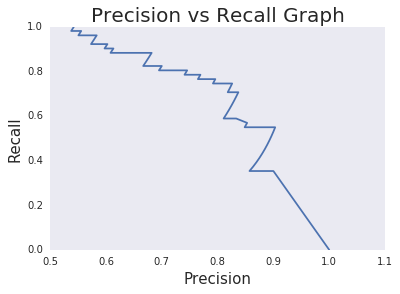

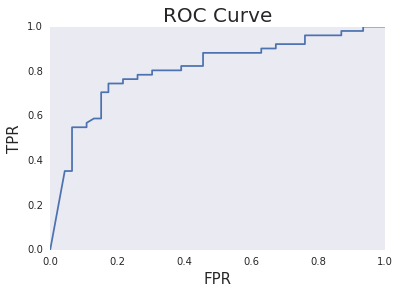

In [102]:
# 1 is potential victim, 0 is 'Normal'
y_pred_probs = nb.predict_proba(test_features)

print(classification_report(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test,[i[1] for i in y_pred_probs])

list_of_scores = []
list_of_auc_scores = []

plt.plot(precision,recall)
plt.title('Precision vs Recall Graph',fontsize=20)
plt.xlabel('Precision',fontsize=15)
plt.ylabel('Recall',fontsize=15)
plt.grid(False)
plt.show()

list_of_auc_scores.append(roc_auc_score(y_test,[i[1] for i in y_pred_probs]))

fpr, tpr, thresholds = (roc_curve(y_test,[i[1] for i in y_pred_probs]))

plt.title('ROC Curve',fontsize=20)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.grid(False)
plt.plot(fpr,tpr)
plt.show()

## Pickling the Model

In [103]:
# save the model to disk
filename = 'human_trafficking_model.pkl'
pickle.dump(nb, open(filename, 'wb'))

In [104]:
test_features.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [105]:
with open('human_trafficking_model.pkl', 'rb') as f:
    x = pickle.load(f)
    y_pred = x.predict(test_features)
#     score = (accuracy_score(predictions, y_test))
    print(y_pred)

[1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1]


## Pipeline (CountVec and MultinomialNB)

In [106]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# import xgboost as xgb

# LogisticRegression Performs Well Here...what?
text_clf = Pipeline([('cntvec', CountVectorizer(ngram_range=(1,2),stop_words=stop)),
                     ('nb', MultinomialNB())])
                     
text_clf = text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)

# print(text_clf.classes_)
# print(text_clf.predict_proba(X_test))
# print(predicted)

print("score:", np.mean(predicted == y_test))

score: 0.680412371134


In [107]:
# save the model to disk
filename = 'allen.pkl'
pickle.dump(text_clf, open(filename, 'wb'))

In [108]:
new_text = ['''Heyy I'm Passion, your ELITE Latina princess✨✨
~I'm 21 years old
~spinner body, always CLASSY and elite but seductive and sexy💋🙊👀
~I'll always be on time and looking my best👑💅🏽, We expect the same in return please 👍🏽
Serious callers only** ~100%REAL PICTURES
~Sorry I don't send photos
~ABSOLUTELY NO EXPLICIT TEXTING 
✔️Verification required 
😘100% independent & DRAMA FREE ☎️
💕✔️✔️ Out calls available now!''']

with open('allen.pkl', 'rb') as f:
    x = pickle.load(f)
    y_pred = x.predict(new_text)
    prob = x.predict_proba(new_text)
#     score = (accuracy_score(predictions, y_test))
    print(y_pred)
    print(prob)

[0]
[[ 0.99819611  0.00180389]]


## AREA 51 (Code beyond this point can be deleted without hesitation)
- Use Andrew's Code (Pair Programming - Troll Hunter)
- Grid Search
- Pair Programming - Spam Classifier

In [109]:
# Playing around with emojis and encoding
a = str(all_details_df['Title'][1])

test = a.split()
# print(test)
answer = [x.encode('unicode-escape') for  x in test]
print(answer)

[b'\\U0001f49f', b'\\U0001f49f', b'\\u2014', b'Loving', b'Skilled', b'Massage', b'\\u2014', b'\\U0001f49f', b'\\U0001f49f', b'\\U0001f49f', b'\\U0001f49f', b'\\u2014', b'Intuitive', b'Healing', b'Touch', b'\\u2665', b'\\u2665', b'by', b'Beautiful', b'Europen']


In [110]:
def colorize(rank):
    if rank <= 10:
        return('token positive_token_1')
    elif rank <= 20 and rank > 10:
        return('token positive_token_2')
    elif rank <= 30 and rank > 20:
        return('token positive_token_3')
    elif rank <= 40 and rank > 30:
        return('token positive_token_4')
    elif rank <= 50 and rank > 40:
        return ('common')

In [119]:
from collections import defaultdict

truth_words_df = pd.read_csv('feat_name.csv')
truth_words_df['rank_color'] = truth_words_df['Ranking'].map(colorize)
# truth_words_df

ngram_and_rank = {}

for i in truth_words_df.values:
#     print(i)
    ngram_and_rank[i[1]] = [i[3],int(i[2])]
ngram_and_rank

filename = 'ngram_and_rank.pkl'
pickle.dump(ngram_and_rank, open(filename, 'wb'))

In [271]:
sentence = '''SICK OF THE SAME BORiNG ROUTiNE?? 
LooKing For Something Different? 
Let's have a good time. I'm Outgoing & Spontaneous.
INDEPENDENT, ALWAYS Well Dressed & Sexy. 
True Provider w/ Skills.
KinKy, CLASSY & NOT SHY! 
SERIOUS CALLERS ONLY PLAYFUL & SENSUAL ” 100% INDEPENDENT 100% ME !! SAFE & DiSCREET
'''

re_sent_split = re.findall(r"[\w']+|[!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\s]", sentence)
print(re_sent_split)

final_sentence = []

for i in re_sent_split:
    if i.lower() in ngram_and_rank and ngram_and_rank[i.lower()][0] != 'common':

        i = "<div class='" + ngram_and_rank[i.lower()][0]+ "' data-tooltip='"+ str(ngram_and_rank[i.lower()][1]) + "'>" + i + "</div>"
        final_sentence.append(i)
    else:
        final_sentence.append(i)
" ".join(final_sentence)
# "".join(re_sent_split)

['SICK', 'OF', 'THE', 'SAME', 'BORiNG', 'ROUTiNE', 'LooKing', 'For', 'Something', 'Different', "Let's", 'have', 'a', 'good', 'time', "I'm", 'Outgoing', 'Spontaneous', 'INDEPENDENT', 'ALWAYS', 'Well', 'Dressed', 'Sexy', 'True', 'Provider', 'w', 'Skills', 'KinKy', 'CLASSY', 'NOT', 'SHY', 'SERIOUS', 'CALLERS', 'ONLY', 'PLAYFUL', 'SENSUAL', '100', 'INDEPENDENT', '100', 'ME', 'SAFE', 'DiSCREET']


"SICK OF THE SAME BORiNG ROUTiNE <div class='token positive_token_3' data-tooltip='27'>LooKing</div> For <div class='token positive_token_4' data-tooltip='38'>Something</div> Different Let's have a <div class='token positive_token_3' data-tooltip='27'>good</div> <div class='token positive_token_1' data-tooltip='8'>time</div> I'm Outgoing Spontaneous <div class='token positive_token_3' data-tooltip='29'>INDEPENDENT</div> <div class='token positive_token_3' data-tooltip='27'>ALWAYS</div> Well Dressed <div class='token positive_token_1' data-tooltip='2'>Sexy</div> True Provider w <div class='token positive_token_4' data-tooltip='40'>Skills</div> KinKy CLASSY NOT SHY SERIOUS CALLERS ONLY <div class='token positive_token_4' data-tooltip='35'>PLAYFUL</div> <div class='token positive_token_3' data-tooltip='24'>SENSUAL</div> 100 <div class='token positive_token_3' data-tooltip='29'>INDEPENDENT</div> 100 ME <div class='token positive_token_4' data-tooltip='36'>SAFE</div> <div class='token posit

In [269]:
def get_pic_html(url):
    list_of_pic_urls = []
    html_code_for_pics = []
    string_of_code = ""
    try:
        page_url = url
        response = requests.get(page_url)
        page = response.text
        soup = BeautifulSoup(page, 'lxml')

        # Post Pictures
        find_pics = soup.find("ul", id="viewAdPhotoLayout")
        li = find_pics.select("li > a > img")
        for link in li:
            list_of_pic_urls.append(link.get('src'))
    except:
        return ("failed")

    list_of_pic_urls = list(set(list_of_pic_urls))

    for url in list_of_pic_urls:
        string_of_code = "<a class=\"carousel-item\" href=\"http://localhost:9000/\"><img src =\"" + url + "\"></a>"
        html_code_for_pics.append(string_of_code)
    return "<div class=\"carousel\">" +  ("".join(html_code_for_pics)) + "</div>"

In [262]:
get_pic_html("http://sf.backpage.com/FemaleEscorts/asian-girl-jess-415-738-2305-busty-sexy-outcall-only/25583175")

'<div class="carousel"><a class="carousel-item" href="http://localhost:9000/"><img src ="http://images3.backpage.com/imager/u/large/306863694/bd11225f9434f91f685c2e4430d824ad.jpg"></a><a class="carousel-item" href="http://localhost:9000/"><img src ="http://images1.backpage.com/imager/u/large/306863688/4e85717621eefa6b949d0f910320e098.jpg"></a></div>'

In [265]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [277]:
re_escortads = re.compile("^cat")

all_ad_info = []

url = 'http://sfbay.backpage.com/FemaleEscorts/?layout=date&page=1'    
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, 'lxml')

ads = soup.find_all(class_=re_escortads)

for ad in ads:
    find_url = ad.find('a')
    find_location = ad.find('span', class_='resultsRegionLabel')

    url = find_url['href']
    title = find_url.text    
    all_ad_info.append([url])
    
url_title_df = pd.DataFrame(all_ad_info, columns=['URL'])

In [279]:
url_title_df.head(10)

,URL
0,http://sfbay.backpage.com/FemaleEscorts/beautiful-asian-girl-gigi-outcall-only-with-408-907-0127/27578091
1,http://sfbay.backpage.com/FemaleEscorts/im-back-outcalls-your-favorite-exotic-petite-bombshell/18524142
2,http://sfbay.backpage.com/FemaleEscorts/sweet-blonde-treat-here-to-please-you-50/38921930
3,http://sfbay.backpage.com/FemaleEscorts/roxy-outcall-only-408-401-1740/38997155
4,http://sfbay.backpage.com/FemaleEscorts/young-caucasian-treat-providing-incalls-specials/37703252
5,http://sfbay.backpage.com/FemaleEscorts/your-aerobic-queen-available-now-outcalls-only/38681834
6,http://sfbay.backpage.com/FemaleEscorts/vip-everything-youve-been-waiting-for-blonde-hair-blue-eyes-princess/30173471
7,http://sfbay.backpage.com/FemaleEscorts/outcall-only-415-683-3245-sexy-hot-asian-girl-cindy/25585205
8,http://sfbay.backpage.com/FemaleEscorts/come-play-with-me-caution-im-addictive-milpitas-ca-outcalls-and-incalls/38491748
9,http://sfbay.backpage.com/FemaleEscorts/asian-outcall-only-call-me-415-683-3245-sexy-taiwanese-eva/25585829
